In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
from sklearn import cluster
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
%matplotlib inline
from google.colab import files
import io

In [3]:
#Read from the csv file and return a Pandas DataFrame.
data = pd.read_csv("/content/drive/MyDrive/Private/Image_Similarity/daily_trans_norm.csv")
data = data.iloc[:,1:]
data 

,"sst(33.0,-33.0)","sst(33.25,-33.0)","sst(33.5,-33.0)","sst(33.75,-33.0)","sst(34.0,-33.0)","sst(34.25,-33.0)","sst(34.5,-33.0)","sst(34.75,-33.0)","sst(35.0,-33.0)","sst(35.25,-33.0)",...,"t2m(40.75,-23.0)","t2m(41.0,-23.0)","t2m(41.25,-23.0)","t2m(41.5,-23.0)","t2m(41.75,-23.0)","t2m(42.0,-23.0)","t2m(42.25,-23.0)","t2m(42.5,-23.0)","t2m(42.75,-23.0)","t2m(43.0,-23.0)"
0,0.248875,0.251932,0.218729,0.167344,0.118699,0.098418,0.119796,0.130408,0.137461,0.151515,...,0.195031,0.185714,0.178300,0.172120,0.154563,0.143675,0.146293,0.156671,0.173913,0.195476
1,0.258726,0.279664,0.243431,0.190116,0.138874,0.113119,0.128353,0.133286,0.145086,0.164616,...,0.258879,0.255773,0.257252,0.258178,0.246343,0.243416,0.248745,0.258991,0.272482,0.286063
2,0.240647,0.263094,0.258533,0.200309,0.129656,0.091264,0.112380,0.124466,0.145409,0.160901,...,0.305736,0.299503,0.298483,0.299952,0.292361,0.286533,0.292380,0.303016,0.319956,0.337499
3,0.231958,0.249908,0.245128,0.200603,0.139170,0.103339,0.122608,0.121866,0.135114,0.140948,...,0.317938,0.310188,0.307004,0.307721,0.296770,0.288846,0.293899,0.300969,0.313605,0.326212
4,0.240659,0.253754,0.254654,0.216030,0.147427,0.101359,0.117548,0.113391,0.130282,0.147317,...,0.190143,0.187680,0.188425,0.187565,0.173116,0.169735,0.179430,0.190691,0.204625,0.221670
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,0.170362,0.195766,0.172818,0.148430,0.143035,0.143919,0.163318,0.165375,0.199486,0.198513,...,0.588905,0.596098,0.604630,0.610445,0.609013,0.611670,0.610786,0.610492,0.609527,0.605396
361,0.173955,0.173547,0.146952,0.128510,0.125444,0.131113,0.152947,0.146213,0.165096,0.172293,...,0.638205,0.640849,0.647078,0.652708,0.654178,0.660341,0.666815,0.674768,0.679556,0.680521
362,0.144499,0.150466,0.120698,0.119222,0.124984,0.127509,0.144510,0.136401,0.158643,0.165772,...,0.546835,0.536497,0.529859,0.526351,0.516071,0.514323,0.518746,0.529035,0.539390,0.548580
363,0.138749,0.139381,0.115668,0.107025,0.106621,0.110516,0.127423,0.116608,0.135778,0.153602,...,0.459513,0.459345,0.463261,0.470769,0.470468,0.471274,0.475541,0.480568,0.486444,0.492528


In [7]:
cols = data.columns
rows = data.index

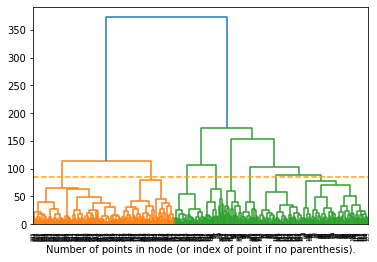

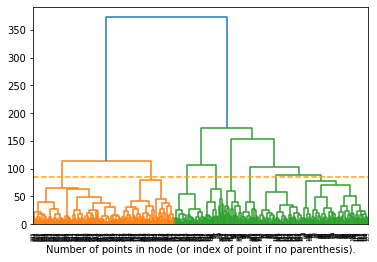

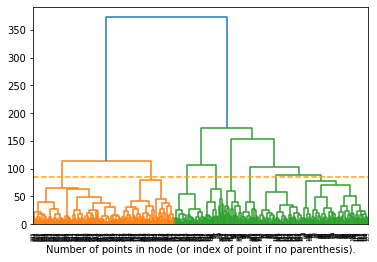

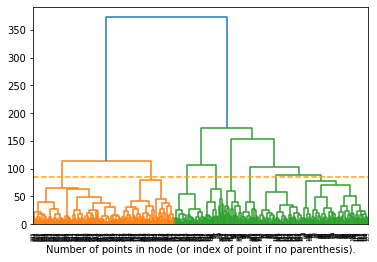

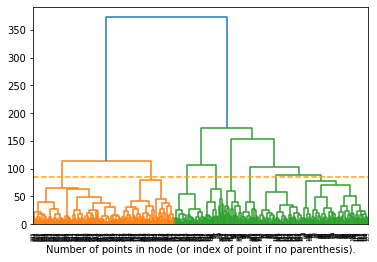

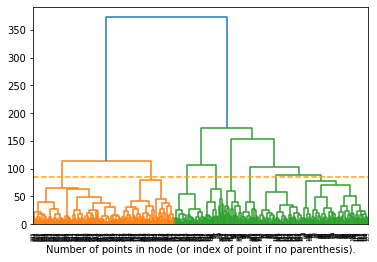

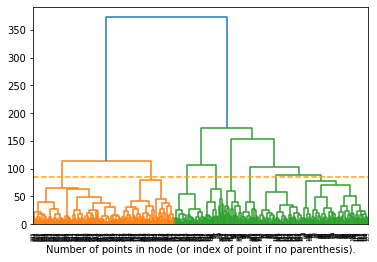

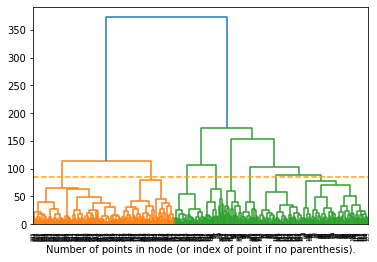

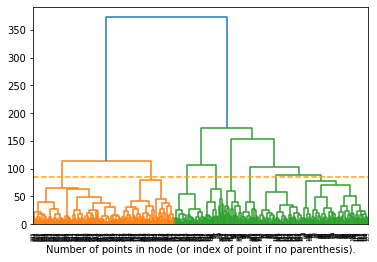

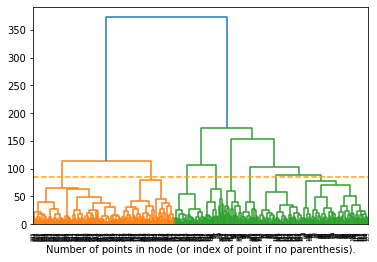

In [6]:
import numpy as np
from sklearn import cluster

import matplotlib.pyplot as plt
%matplotlib inline
from google.colab import files
import io

#Read from the csv file and return a Pandas DataFrame.
data = pd.read_csv("/content/drive/MyDrive/Private/Image_Similarity/daily_trans_norm.csv")
data = data.iloc[:,1:]
data 

#define dendrogram
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram
  
    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    #dendrogram(linkage_matrix, **kwargs)

    # creating the dendrogram
    dendrogram(linkage(data, method  = "ward"))

    plt.axhline(y = 85, color='orange', linestyle ="--")


#List of algorithms
clustering_algorithms = (
    ('Single Linkage', 'single'),
    ('Average Linkage', 'average'),
    ('Complete Linkage', 'complete'),
    ('Ward Linkage', 'ward'),
)  

#distance metrics
affinity_metrics = ['cosine', 'euclidean', 'manhattan']

#apply the algorithm 
for metric in affinity_metrics: 
    for alg_name, alg in clustering_algorithms:
        if alg == 'ward' and metric != 'euclidean': continue
        model = cluster.AgglomerativeClustering(linkage=alg, affinity=metric, distance_threshold=0, n_clusters=None)
    
        #model.fit(data)
        y_model = model.fit(data)
        labels = y_model.labels_
        
        # plot the top five levels of the dendrogram
        plot_dendrogram(model, truncate_mode='level', p=3, labels=labels.tolist(), orientation='right')
        plt.xlabel("Number of points in node (or index of point if no parenthesis).")
        plt.show()